<a href="https://colab.research.google.com/github/RyuMyunggi/data-structure/blob/main/linked_list.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linked List: 연결리스트
* 각 노드가 데이터와 다음 노드에 대한 포인터를 가지고 한 줄로 연결되어 있는 방식으로 데이터를 저장하는 자료 구조
* 노드: 데이터 저장단위 (데이터 값, 포인터)로 구성됨.
* 포인터: 각 노드 안에서 다음이나 이전의 노드와의 연결 정보를 가지고 있는 공간
* 마지막 노드는 None 값을 가짐
* 이름에서 말하듯 데이터를 담고 잇는 노드들이 연결되어 노드의 포인터가 다음이나 이전 노드와의 연결을 담당
* 연결리스트로 스택과 큐를 구현할 수 있음

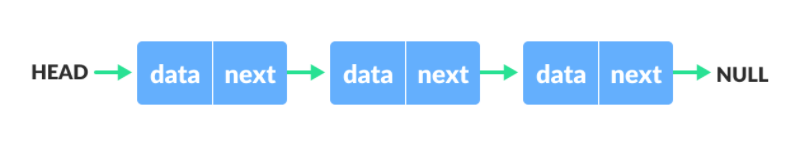

## 연결 리스트 특징
* 배열은 순차적으로 연결된 공간에 데이터를 나열하는 데이터 구조
* 링크드 리스트는 떨어진 곳에 존재하는 데이터를 화살표로 연결하는 데이터구조
* 파이썬의 리스트 타입이 링크드 리스트의 기능을 모두 지원

### 장점
* 배열은 미리 데이터의 공간을 할당해야하지만 링크드 리스트는 미리 데이터 공간을 할당하지 않아도됨
* 데이터의 이동 없이 중간에 삽입 / 삭제 가능

### 단점
* 랜덤 엑세스가 불가능
  * 데이터를 연결된 주소에 저장하는 것이 아니라 따로 떨어트려서 저장하고 그 들의 주소를 이어서 만든 구조이므로 원하는 주소로 바로 접근하지 못하고 노드 주소칸을 계속 타고 넘어야 원하는 주소로 도달할 수 있음. (==연결 정보를 찾는 시간이 필요하므로 접근 속도가 느림)
* 중간 데이터 삭제시, 앞뒤 데이터 연결을 재 구성하는 부가적인 작업이 필요
* Head의 주소는 반드시 기억해야함
  * 따라서 메모리를 해제할 때도 반드시 뒤에서부터 해제해야함. 만약 head의 주소를 일어버리게 되면 뒤쪽 원소들을 탐색하거나 데이터를 삽입/삭제하는 등의 연산ㅇ르 수행할 수 없음
* 캐싱에 적합하지 않음.
  * 연결 리스트 탐색은 Loop를 돌아야함. O(n)의 시간 복잡도를 가짐. 배열 리스트 탐색을 O(1)의 시간 복잡도를 갖음. 하지만 실제 계산해보면 배열 리스트 탐색이 압도적으로 빠르다
  * 바로 컴퓨터 안에 이 있는 캐시라는 저장공간 떄문. 배열 리스트의 경우 같은 타입의 데이터들은 연속된 메모리 공간에 저장되어 있음. 때문에 메모리에서 캐시로 데이터를 넘길 때 이 데이터들이 한 번에 같이 넘어가 매우 빨리 처리할 수 있음. 하지만 연결 리스트의 경우데이터를 메모리 곳곳에 저장한 뒤 이들을 주소로만 연결해놓은 구조이기 때문에 데이터가 캐시로 한번에 넘어오지 못하고 CPU가 이들이 넘어올 떄까지 기다려야 하므로 처리속도가 매우 느려짐
* 복잡한 연산에 오버헤드 발생
  * 일반적인 배열 리스트 연산보다 연결리스트의 연산들이 훨씬 복잡함. 따라서 모든 연산을 수행할 떄 더 많은 명령어가 필요하고 때문에 더 많은 오버헤드가 발생
* 주소 저장으로 인한 공간 낭비
  * 연결리스트의 겨우 데이터 이외에도 주소에 대한 정보를 반드시 가지고 있어야 하기 때문에 주소에 대한 용량이 소모. 일반적으로 정수형 리스트의 경우 데이터와 주소를 저장하기 때문에 배열 리스트와 비교하여 2배의 용량이 필요하다 (== 연결을 위한 별도 데이터 공간이 필요하므로, 저장 공간 효율이 낮음)

In [3]:
class Node(object):
  def __init__(self, value=None, pointer=None):
    self.value = value
    self.pointer = pointer

  def getData(self):
    return self.value

  def getNext(self):
    return self.pointer

  def setData(self, new_data):
    self.value = new_data
  
  def setNext(self, new_pointer):
    self.pointer = new_pointer


L = Node('a', Node('b', Node('c', Node('d'))))
assert(L.pointer.pointer.value=='c')

print(L.getData())
print(L.getNext().getData())
L.setData('aa')
L.setNext(Node('e'))
print(L.getData())
print(L.getNext().getData())

a
b
aa
e


In [6]:
## 위의 노드들로 이루어진 후입선출(LIFO) 연결리스트 구현

class LinkedListLIFO(object):
  def __init__(self):
    self.head = None
    self.length = 0

  def _printList(self):
    node = self.head
    while node:
      print(node.value, end=' ')
      node = node.pointer
    print()

  def _delete(self, prev, node):
    self.length -= 1
    if not prev:
      self.head = node.pointer
    else:
      prev.pointer = node.pointer

  def _add(self, value):
    self.length += 1
    self.head = Node(value, self.head)

  def _find(self, index):
    prev = None
    node = self.head
    i = 0
    while node and i < index:
      prev = node
      node = node.pointer
      i += 1
    return node, prev, i

  def _find_by_value(self, value):
    prev = None
    node = self.head
    found = False
    while node and not found:
      if node.value == value:
        found = True
      else:
        prev = node
        node = node.pointer
    return node, prev, found

  def deleteNode(self, index):
    node, prev, i = self._find(index)
    if index == i:
      self._delete(prev, node)
    else:
      print(f'인덱스 {index}에 해당하는 노드가 없습니다')

  def deleteNodeByValue(self, value):
    node, prev, found = self._find_by_value(value)
    if found:
      self._delete(prev, node)
    else:
      print(f'값 {value}에 해당하는 노드가 없습니다')


ll = LinkedListLIFO()
for i in range(1, 5):
  ll._add(i)
print('연결 리스트 출력')
ll._printList()
print('인덱스가 2인 노드 삭제 후, 연결 리스트 출력: ')
ll.deleteNode(2)
ll._printList()
print('인덱스가 3인 노드 삭제 후, 연결 리스트 출력: ')
ll.deleteNodeByValue(3)
ll._printList()
print('값이 15인 노드 추가 후, 연결 리스트 출력: ')
ll._add(15)
ll._printList()
print('모든 노드 삭제 후, 연결 리스트 출력')
for i in range(ll.length-1, -1, -1):
  ll.deleteNode(i)
ll._printList()

연결 리스트 출력
4 3 2 1 
인덱스가 2인 노드 삭제 후, 연결 리스트 출력: 
4 3 1 
인덱스가 3인 노드 삭제 후, 연결 리스트 출력: 
4 1 
값이 15인 노드 추가 후, 연결 리스트 출력: 
15 4 1 
모든 노드 삭제 후, 연결 리스트 출력



In [9]:
class LinkedListFIFO(object):
  def __init__(self):
    self.head = None
    self.length = 0
    self.tail = None

  def _printList(self):
    node = self.head
    while node:
      print(node.value, end=' ')
      node = node.pointer
    print()

  def _addFirst(self, value):
    self.length = 1
    node = Node(value)
    self.head = node
    self.tail = node

  def _deleteFirst(self):
    self.length = 0
    self.head = None
    self.tail = None
    print('연결 리스트가 비었습니다')

  def _add(self, value):
    self.length += 1
    node = Node(value)
    if self.tail:
      self.tail.pointer = node
    self.tail = node

  def addNode(self, value):
    if not self.head:
      self._addFirst(value)
    else:
      self._add(value)

  def _find(self, index):
    prev = None
    node = self.head
    i = 0
    while node and i < index:
      prev = node
      node = node.pointer
      i += 1

    return node, prev, i

  def _find_by_value(self, value):
    prev = None
    node = self.head
    found = False
    while node and not found:
      if node.value == value:
        found = True
      else:
        prev = node
        node = node.pointer
      
    return node, prev, found

  def deleteNode(self, index):
    if not self.head or not self.head.pointer:
      self._deleteFirst()
    else:
      node, prev, i = self._find(index)
      if i == index and node:
        self.length -= 1
        if i == 0 or not prev:
          self.head = node.pointer
          self.tail = node.pointer
        else:
          prev.pointer = node.pointer
      else:
        print(f'인덱스 {index}에 해당하는 노드가 없습니다')
  
  def deleteNodeByValue(self, value):
    if not self.head or not self.head.pointer:
      self._deleteFirst()
    else:
      node, prev, i = self._find_by_value(value)
      if node and node.value == value:
        self.length -= 1
        if i ==0 or not prev:
          self.head = node.pointer
          self.tail = node.pointer
        else:
          prev.pointer = node.pointer
      else:
        print(f'값 {value}에 해당하는 노드가 없습니다')


ll = LinkedListFIFO()
for i in range(1, 5):
  ll.addNode(i)
print('연결 리스트 출력')
ll._printList()
print('인덱스가 2인 노드 삭제 후, 연결 리스트 출력: ')
ll.deleteNode(2)
ll._printList()

print('값이 15인 노드 추가 후, 연결 리스트 출력')
ll.addNode(15)
ll._printList()
print('모든 노드 삭제 후, 연결 리스트 출력')
for i in range(ll.length-1, -1, -1):
  ll.deleteNode(i)
ll._printList()


연결 리스트 출력
1 2 3 4 
인덱스가 2인 노드 삭제 후, 연결 리스트 출력: 
1 2 4 
값이 15인 노드 추가 후, 연결 리스트 출력
1 2 4 15 
모든 노드 삭제 후, 연결 리스트 출력
연결 리스트가 비었습니다



## 참고자료
* https://www.fun-coding.org/Chapter07-linkedlist.html
* https://gusdnd852.tistory.com/100
* https://ybworld.tistory.com/85
* https://eunchankim-dev.tistory.com/45